# Learn_ML_from_Titanic_Disaster 
Exploratory Data Analysis (EDA) and Machine Learning to predict the survival of Titanic Passengers

![](https://miro.medium.com/max/1024/0*KfHijq1bO1nDV5Dl.jpg)







You are going to embark on your first Exploratory Data Analysis (EDA) and Machine Learning to predict the survival of Titanic Passengers. This is the genesis challenge for most onboarding data scientists and will set you up for success. I hope this article inspires you. All aboard!!!

1. Introduction of ML
2. About Titanic Problem
3. Project Work Flow
    - Problem Defintion
        - Problme Feature
        - Variables
        - Objective
        - Input & Output
    - Loading Packages or Import Libraries
    - Gathering Data or Data Collection
    - Exploratory Data Analysis(EDA)
        - Data Analysis
        - Data Pre-processing
        - Data Wraggling   
    - Training and Testing the model
    - Evaluation
    - Submission

## Introduction of ML:
What is Machine Learning (ML)?
Machine Learning (ML) is the science of getting machine to act without being explicitly programmed.

Machine learning is a type of artificial intelligence (AI) that allows software applications to learn from the data and become more accurate in predicting outcomes without human intervention.

Machine Learning is a subset of artificial intelligence (AI) which focuses mainly on machine learning from their experience and making predictions based on its experience.

Machine Learning is an application of artificial intelligence (AI) which provides systems the ability to automatically learn and improve from experience without being explicitly programmed.

## About Titanic Problem
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

## Project WorkFlow

### Problem Definition:
I think one of the important things when you start a new machine learning project is Defining your problem. that means you should understand business problem.( Problem Formalization).

### Problem Feature
The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. That's why the name DieTanic. This is a very unforgetable disaster that no one in the world can forget.

It took about $7.5 million to build the Titanic and it sunk under the ocean due to collision. The Titanic Dataset is a very good dataset for begineers to start a journey in data science and participate in competitions in Kaggle.

### Objective:
As a data scientist, it's your job to predict if a passenger survived the sinking of the Titanic or not. For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.(binary classification)

### Variables:
1. Age : Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

2. Sibsp : The dataset defines family relations in this way...

    a. Sibling = brother, sister, stepbrother, stepsister

    b. Spouse = husband, wife (mistresses and fianc√©s were ignored)

3. Parch: The dataset defines family relations in this way...

    a. Parent = mother, father

    b. Child = daughter, son, stepdaughter, stepson

    c. Some children travelled only with a nanny, therefore parch=0 for them.

4. Pclass : A proxy for socio-economic status (SES).
    1st = Upper
    2nd = Middle
    3rd = Lower

5. Embarked : Nominal datatype

6. Name: Nominal datatype . It could be used in feature engineering to derive the gender from title.

7. Sex: Nominal datatype

8. Ticket: That have no impact on the outcome variable. Thus, they will be excluded from analysis

9. Cabin: It'a a nominal datatype that can be used in feature engineering

10. Fare: Indicating the fare

11. PassengerID: have no impact on the outcome variable. Thus, it will be excluded from analysis

12. Survival: dependent variable , 0 or 1


## Import all required or necessary libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization
sns.set_style('whitegrid')
import matplotlib.pyplot as plt # data visualization
%matplotlib inline

#### Librarires using for Machine Learning Algorithm

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier

## Gathering Data or Data Collection

### Know how to import your data?

Find what you have in your data folder?

In [3]:
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'gender_submission.csv', 'test.csv']


### Import or Load all of your data from the data folder

In [4]:
titanic_train = pd.read_csv("../input/train.csv")
titanic_test = pd.read_csv("../input/test.csv")

#### Let's see the size or shpae of your data

In [5]:
print("Train: rows:{} columns:{}".format(titanic_train.shape[0], titanic_train.shape[1]))

Train: rows:891 columns:12


In [6]:
print("Test Data Shape",titanic_test.shape)

Test Data Shape (418, 11)


#### Let's preview top 5 and bottom 5 records from training dataset

In [7]:
titanic_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [8]:
titanic_train.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

#### Let's preview top 5 and bottom 5 records form test dataset

In [9]:
titanic_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [10]:
titanic_test.tail()

PassengerId  Pclass                          Name     Sex   Age  SibSp  \
413         1305       3            Spector, Mr. Woolf    male   NaN      0   
414         1306       1  Oliva y Ocana, Dona. Fermina  female  39.0      0   
415         1307       3  Saether, Mr. Simon Sivertsen    male  38.5      0   
416         1308       3           Ware, Mr. Frederick    male   NaN      0   
417         1309       3      Peter, Master. Michael J    male   NaN      1   

     Parch              Ticket      Fare Cabin Embarked  
413      0           A.5. 3236    8.0500   NaN        S  
414      0            PC 17758  108.9000  C105        C  
415      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416      0              359309    8.0500   NaN        S  
417      1                2668   22.3583   NaN        C

In [11]:
print("Total Number of passagner on Titanic (from training data):", str(len(titanic_train)))

Total Number of passagner on Titanic (from training data): 891


## Exploratory Data Analysis

### Data Analysis
Data pre-processing is one of the most important steps in machine learning. It is the most important step that helps in building machine learning models more accurately. In machine learning, there is an 80/20 rule. Every data scientist should spend 80% time for data pre-processing and 20% time to actually perform the analysis.


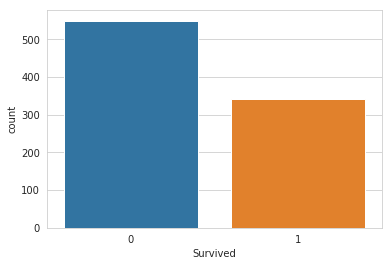

In [12]:
sns.countplot(x="Survived", data=titanic_train)

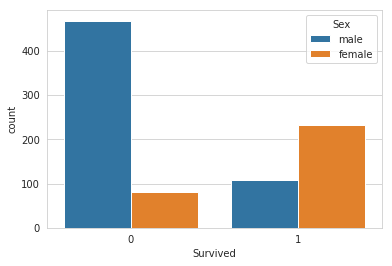

In [13]:
sns.countplot(x="Survived", hue = 'Sex', data=titanic_train)

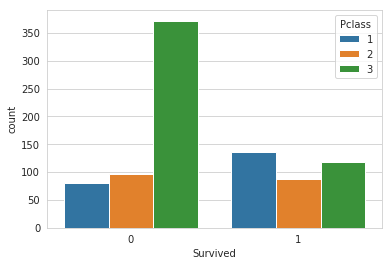

In [14]:
sns.countplot(x = "Survived", hue = "Pclass", data = titanic_train)

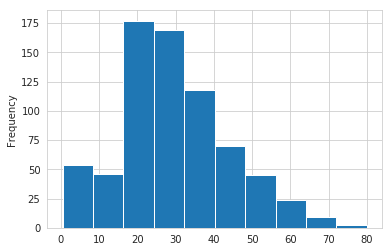

In [15]:
titanic_train['Age'].plot.hist()

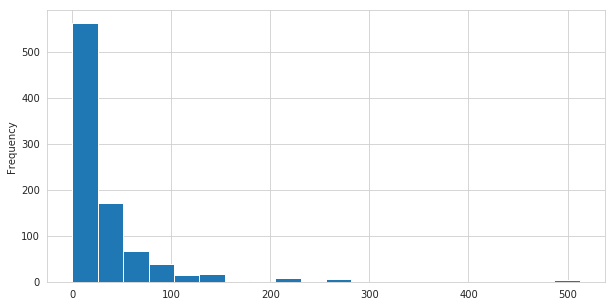

In [16]:
titanic_train['Fare'].plot.hist(bins = 20, figsize = (10,5))

In [17]:
titanic_train.info()
print("----------------------------")
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

Above mentioned information shows some missing values present in both training and test datasets

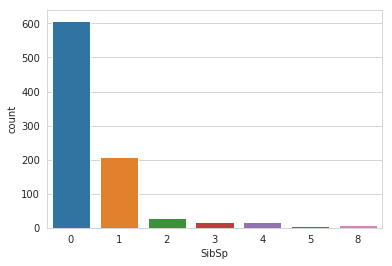

In [18]:
sns.countplot(x= "SibSp", data = titanic_train)

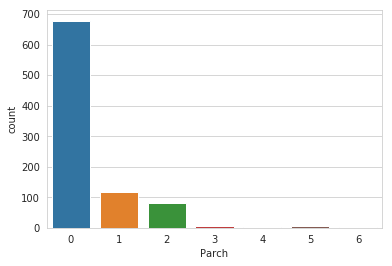

In [19]:
sns.countplot(x = "Parch", data = titanic_train)

### Data Pre-Processing & Data Cleaning

Let's see, how to check missed data?

In [20]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

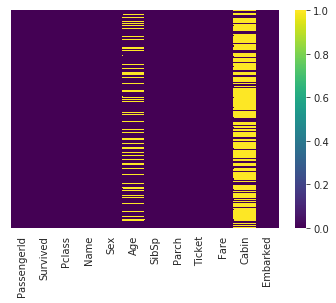

In [21]:
sns.heatmap(titanic_train.isnull(), yticklabels=False, cmap = 'viridis')

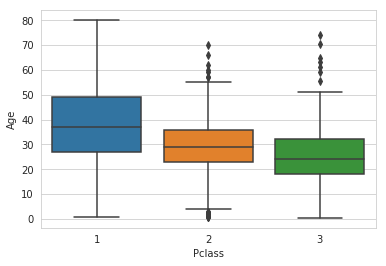

In [22]:
sns.boxplot(x = 'Pclass', y = 'Age', data = titanic_train)

In [23]:
print("Training dataset columns:",titanic_train.columns)
print("-------------------------------")
print("Training dataset columns:",titanic_test.columns)

Training dataset columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
-------------------------------
Training dataset columns: Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [24]:
# Drop unnecessary columns, these columns won't be useful in analysis and prediction
titanic_train = titanic_train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)
titanic_test = titanic_test.drop(['Name','Ticket','Cabin'], axis=1)

In [25]:
print("Training dataset columns:",titanic_train.columns)
print("-------------------------------")
print("Training dataset columns:",titanic_test.columns)

Training dataset columns: Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')
-------------------------------
Training dataset columns: Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


### Embarked

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


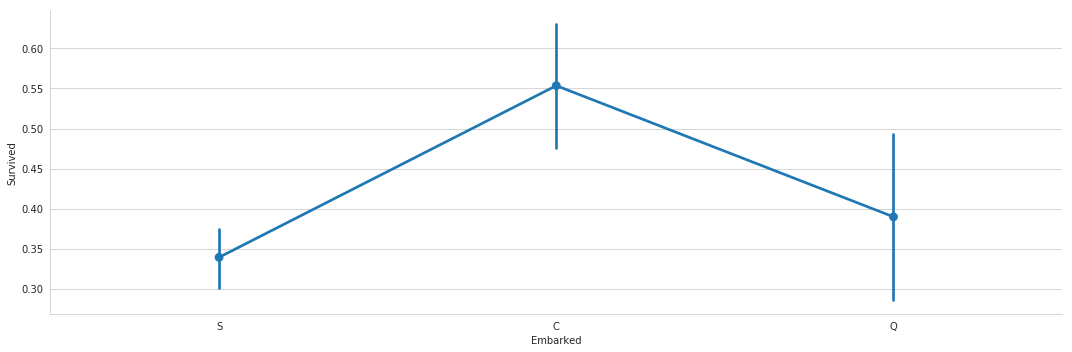

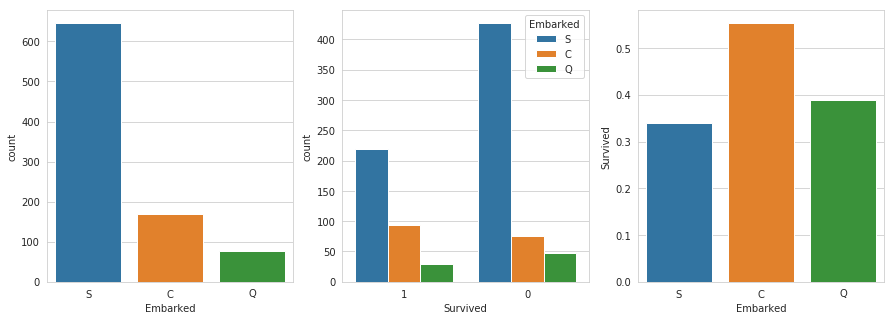

In [26]:
# Only in titanic_train dataset, fill the two missing values with the most occurred value, which is "S".
titanic_train["Embarked"] = titanic_train["Embarked"].fillna("S")

# plot
sns.factorplot('Embarked','Survived', data=titanic_train, size=5, aspect=3)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

# sns.factorplot('Embarked', data=titanic_df, kind='count', order=['S','C','Q'], ax=axis1)
# sns.factorplot('Survived',hue="Embarked",data=titanic_df,kind='count',order=[1,0],ax=axis2)
sns.countplot(x='Embarked', data=titanic_train, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_train, order=[1,0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
embark_perc = titanic_train[["Embarked", "Survived"]].groupby(['Embarked'],as_index=False).mean()
sns.barplot(x='Embarked', y='Survived', data=embark_perc,order=['S','C','Q'],ax=axis3)

In [27]:
'''
Either to consider Embarked column in predictions, and remove "S" dummy variable, 
and leave "C" & "Q", since they seem to have a good rate for Survival.

OR, don't create dummy variables for Embarked column, just drop it, 
because logically, Embarked doesn't seem to be useful in prediction.
'''

embark_dummies_titanic_train  = pd.get_dummies(titanic_train['Embarked'])
embark_dummies_titanic_train.drop(['S'], axis=1, inplace=True)

embark_dummies_titanic_test  = pd.get_dummies(titanic_test['Embarked'])
embark_dummies_titanic_test.drop(['S'], axis=1, inplace=True)

In [28]:
titanic_train = titanic_train.join(embark_dummies_titanic_train)
titanic_test  = titanic_test.join(embark_dummies_titanic_test)

In [29]:
titanic_train.drop(['Embarked'], axis=1,inplace=True)
titanic_test.drop(['Embarked'], axis=1,inplace=True)

In [30]:
titanic_train.head()

Survived  Pclass     Sex   Age  SibSp  Parch     Fare  C  Q
0         0       3    male  22.0      1      0   7.2500  0  0
1         1       1  female  38.0      1      0  71.2833  1  0
2         1       3  female  26.0      0      0   7.9250  0  0
3         1       1  female  35.0      1      0  53.1000  0  0
4         0       3    male  35.0      0      0   8.0500  0  0

In [31]:
titanic_test.head()

PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare  C  Q
0          892       3    male  34.5      0      0   7.8292  0  1
1          893       3  female  47.0      1      0   7.0000  0  0
2          894       2    male  62.0      0      0   9.6875  0  1
3          895       3    male  27.0      0      0   8.6625  0  0
4          896       3  female  22.0      1      1  12.2875  0  0

## Fare

In [32]:
# Only for titanic_test, since there is a missing "Fare" values
titanic_test["Fare"].fillna(titanic_test["Fare"].median(), inplace=True)

In [33]:
# Convert from float to int
titanic_train['Fare'] = titanic_train['Fare'].astype(int)
titanic_test['Fare'] = titanic_test['Fare'].astype(int)

In [34]:
# Get fare for survived & didn't survive passengers 
fare_not_survived = titanic_train["Fare"][titanic_train["Survived"] == 0]
fare_survived     = titanic_train["Fare"][titanic_train["Survived"] == 1]

# Get average and std for fare of survived/not survived passengers
avg_fare = pd.DataFrame([fare_not_survived.mean(), fare_survived.mean()])
std_fare = pd.DataFrame([fare_not_survived.std(), fare_survived.std()])

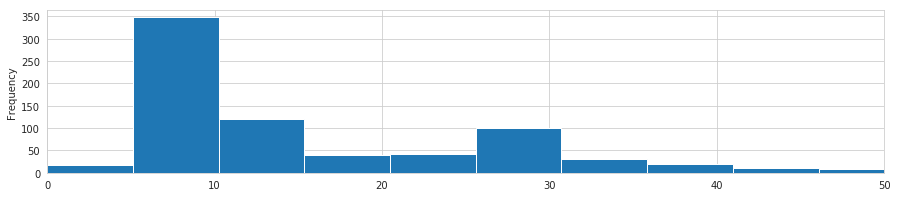

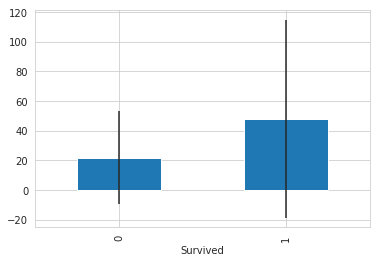

In [35]:
# plot
titanic_train['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))

avg_fare.index.names = std_fare.index.names = ["Survived"]
avg_fare.plot(yerr=std_fare,kind='bar',legend=False)

## Age

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


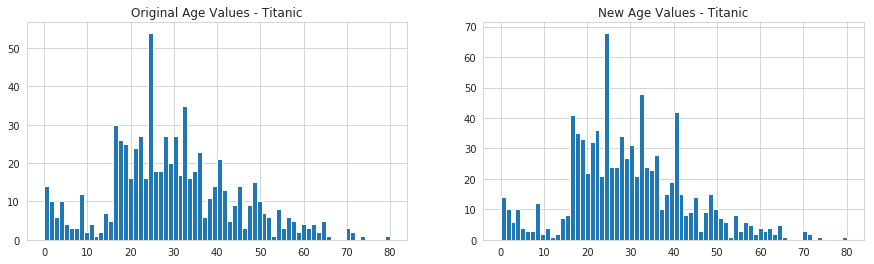

In [36]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age Values - Titanic')
axis2.set_title('New Age Values - Titanic')

# axis3.set_title('Original Age values - Test')
# axis4.set_title('New Age values - Test')

# Get Average, STD, and Number of NaN values in titanic_train
avg_age_titanic_train = titanic_train["Age"].mean()
std_age_titanic_train = titanic_train["Age"].std()
count_nan_age_titanic_train = titanic_train["Age"].isnull().sum()

# Get Average, STD, and Number of NaN values in titanic_test
avg_age_titanic_test = titanic_test["Age"].mean()
std_age_titanic_test = titanic_test["Age"].std()
count_nan_age_titanic_test = titanic_test["Age"].isnull().sum()

# Generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(avg_age_titanic_train - std_age_titanic_train, avg_age_titanic_train + std_age_titanic_train, size = count_nan_age_titanic_train)
rand_2 = np.random.randint(avg_age_titanic_test - std_age_titanic_test, avg_age_titanic_test + std_age_titanic_test, size = count_nan_age_titanic_test)

# plot original Age values
# NOTE: drop all null values, and convert to int
titanic_train['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
# test_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
titanic_train["Age"][np.isnan(titanic_train["Age"])] = rand_1
titanic_test["Age"][np.isnan(titanic_test["Age"])] = rand_2

# Convert from float to int
titanic_train['Age'] = titanic_train['Age'].astype(int)
titanic_test['Age'] = titanic_test['Age'].astype(int)
        
# plot new Age Values
titanic_train['Age'].hist(bins=70, ax=axis2)
#titanic_test['Age'].hist(bins=70, ax=axis4)

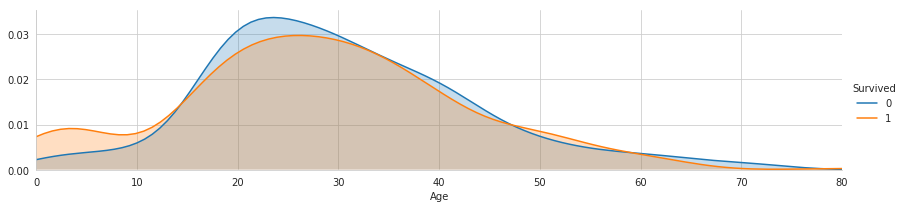

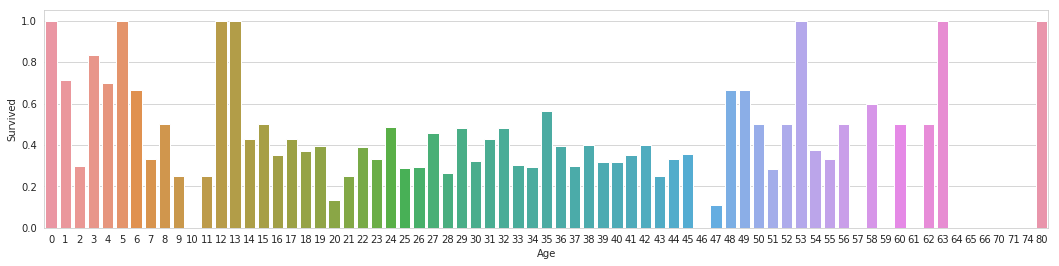

In [37]:
# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(titanic_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_train['Age'].max()))
facet.add_legend()

# average survived passengers by age
fig, axis1 = plt.subplots(1,1,figsize=(18,4))
avg_age = titanic_train[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=avg_age)

## Family

In [38]:
""" 
Instead of having two columns Parch & SibSp, We can have only one column represent 
if the passenger had any family member aboard or not,
Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
"""
# make changes with training dataset
titanic_train['Family'] =  titanic_train["Parch"] + titanic_train["SibSp"]
titanic_train['Family'].loc[titanic_train['Family'] > 0] = 1
titanic_train['Family'].loc[titanic_train['Family'] == 0] = 0

# make changes with test dataset
titanic_test['Family'] =  titanic_test["Parch"] + titanic_test["SibSp"]
titanic_test['Family'].loc[titanic_test['Family'] > 0] = 1
titanic_test['Family'].loc[titanic_test['Family'] == 0] = 0

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:202: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [39]:
# Now we will drop Parch & SibSp
titanic_train = titanic_train.drop(['SibSp','Parch'], axis=1)
titanic_test = titanic_test.drop(['SibSp','Parch'], axis=1)

[Text(0, 0, 'With Family'), Text(0, 0, 'Alone')]

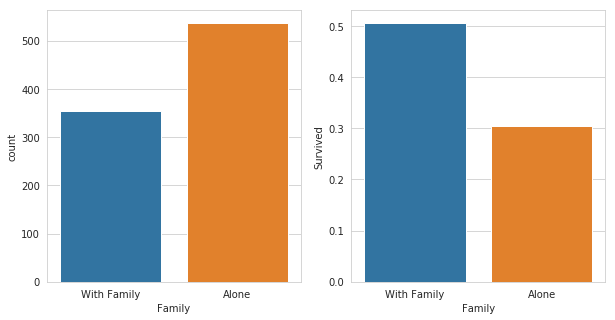

In [40]:
# Plot
fig, (axis1,axis2) = plt.subplots(1,2,sharex=True,figsize=(10,5))

# sns.factorplot('Family',data=titanic_train,kind='count',ax=axis1)
sns.countplot(x='Family', data=titanic_train, order=[1,0], ax=axis1)

# average of survived for those who had/didn't have any family member
family_perc = titanic_train[["Family", "Survived"]].groupby(['Family'],as_index=False).mean()
sns.barplot(x='Family', y='Survived', data=family_perc, order=[1,0], ax=axis2)

axis1.set_xticklabels(["With Family","Alone"], rotation=0)

## Sex

In [41]:
# As we see, children(age < 16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child

def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
titanic_train['Person'] = titanic_train[['Age','Sex']].apply(get_person,axis=1)
titanic_test['Person'] = titanic_test[['Age','Sex']].apply(get_person,axis=1)

# No need to use Sex column since we created Person column
titanic_train.drop(['Sex'],axis=1,inplace=True)
titanic_test.drop(['Sex'],axis=1,inplace=True)

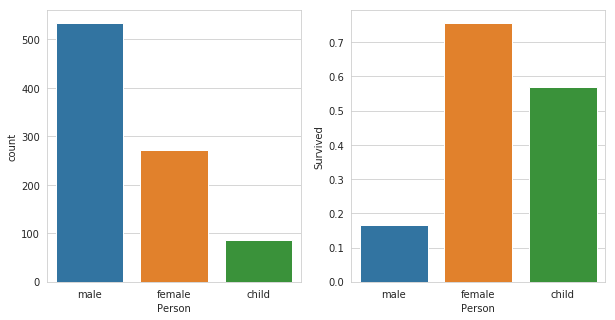

In [42]:
# Create dummy variables for Person column, & drop Male as it has the lowest average of survived passengers
person_dummies_titanic_train  = pd.get_dummies(titanic_train['Person'])
person_dummies_titanic_train.columns = ['Child','Female','Male']
person_dummies_titanic_train.drop(['Male'], axis=1, inplace=True)

person_dummies_titanic_test  = pd.get_dummies(titanic_test['Person'])
person_dummies_titanic_test.columns = ['Child','Female','Male']
person_dummies_titanic_test.drop(['Male'], axis=1, inplace=True)

titanic_train = titanic_train.join(person_dummies_titanic_train)
titanic_test = titanic_test.join(person_dummies_titanic_test)

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

# sns.factorplot('Person',data=titanic_train,kind='count',ax=axis1)
sns.countplot(x='Person', data=titanic_train, ax=axis1)

# average of survived for each Person(male, female, or child)
person_perc = titanic_train[["Person", "Survived"]].groupby(['Person'],as_index=False).mean()
sns.barplot(x='Person', y='Survived', data=person_perc, ax=axis2, order=['male','female','child'])

In [43]:
titanic_train.drop(['Person'],axis=1,inplace=True)
titanic_test.drop(['Person'],axis=1,inplace=True)

# PClass

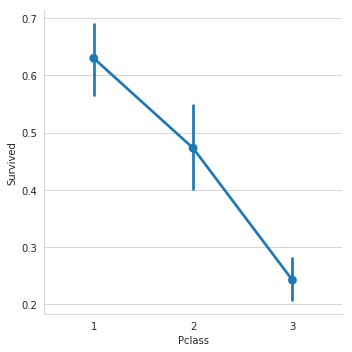

In [44]:
# sns.factorplot('Pclass',data=titanic_train,kind='count',order=[1,2,3])
sns.factorplot('Pclass','Survived',order=[1,2,3], data=titanic_train, size=5)

# create dummy variables for Pclass column, & drop 3rd class as it has the lowest average of survived passengers
pclass_dummies_titanic_train  = pd.get_dummies(titanic_train['Pclass'])
pclass_dummies_titanic_train.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic_train.drop(['Class_3'], axis=1, inplace=True)

pclass_dummies_titanic_test  = pd.get_dummies(titanic_test['Pclass'])
pclass_dummies_titanic_test.columns = ['Class_1','Class_2','Class_3']
pclass_dummies_titanic_test.drop(['Class_3'], axis=1, inplace=True)

titanic_train = titanic_train.join(pclass_dummies_titanic_train)
titanic_test = titanic_test.join(pclass_dummies_titanic_test)

In [45]:
titanic_train.drop(['Pclass'],axis=1,inplace=True)
titanic_test.drop(['Pclass'],axis=1,inplace=True)

In [46]:
titanic_train.head()

Survived  Age  Fare  C  Q  Family  Child  Female  Class_1  Class_2
0         0   22     7  0  0       1      0       0        0        0
1         1   38    71  1  0       1      0       1        1        0
2         1   26     7  0  0       0      0       1        0        0
3         1   35    53  0  0       1      0       1        1        0
4         0   35     8  0  0       0      0       0        0        0

In [47]:
titanic_test.head()

PassengerId  Age  Fare  C  Q  Family  Child  Female  Class_1  Class_2
0          892   34     7  0  1       0      0       0        0        0
1          893   47     7  0  0       1      0       1        0        0
2          894   62     9  0  1       0      0       0        0        1
3          895   27     8  0  0       0      0       0        0        0
4          896   22    12  0  0       1      0       1        0        0

In [48]:
# Descriptive statistics for each column
titanic_train.describe()

Survived         Age        Fare           C           Q      Family  \
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000   
mean     0.383838   29.461279   31.785634    0.188552    0.086420    0.397306   
std      0.486592   13.514013   49.703730    0.391372    0.281141    0.489615   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000   21.000000    7.000000    0.000000    0.000000    0.000000   
50%      0.000000   28.000000   14.000000    0.000000    0.000000    0.000000   
75%      1.000000   37.500000   31.000000    0.000000    0.000000    1.000000   
max      1.000000   80.000000  512.000000    1.000000    1.000000    1.000000   

            Child      Female     Class_1     Class_2  
count  891.000000  891.000000  891.000000  891.000000  
mean     0.096521    0.304153    0.242424    0.206510  
std      0.295470    0.460306    0.428790    0.405028  
min      0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000  
75%      0.000000    1.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000

In [49]:
titanic_test.describe()

PassengerId         Age        Fare           C           Q  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000   30.574163   35.133971    0.244019    0.110048   
std     120.810458   13.199284   55.855855    0.430019    0.313324   
min     892.000000    0.000000    0.000000    0.000000    0.000000   
25%     996.250000   22.000000    7.000000    0.000000    0.000000   
50%    1100.500000   29.000000   14.000000    0.000000    0.000000   
75%    1204.750000   39.000000   31.000000    0.000000    0.000000   
max    1309.000000   76.000000  512.000000    1.000000    1.000000   

           Family       Child      Female     Class_1     Class_2  
count  418.000000  418.000000  418.000000  418.000000  418.000000  
mean     0.394737    0.076555    0.332536    0.255981    0.222488  
std      0.489380    0.266203    0.471686    0.436934    0.416416  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000    0.000000    0.000000  
75%      1.000000    0.000000    1.000000    1.000000    0.000000  
max      1.000000    1.000000    1.000000    1.000000    1.000000

## Define Training and Testing datasets

In [50]:
X_train = titanic_train.drop("Survived",axis=1)
Y_train = titanic_train["Survived"]
X_test  = titanic_test.drop("PassengerId",axis=1).copy()

## Training and Testing the Models
1. Logistic Regression
2. SVM (Support Vetor Machine)
3. Random Forest

### 1. Logistic Regression


In [51]:
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = logreg.score(X_train, Y_train)

acc_log

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8092031425364759

## 2. Support Vector Machine (SVM)

Object `svm` not found.


In [52]:
# Support Vector Machines

svc = SVC()

svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

acc_svc = svc.score(X_train, Y_train)

acc_svc

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8608305274971941

## 3. Random Forest

In [53]:
# Random Forests

random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

acc_random_forest = random_forest.score(X_train, Y_train)

acc_random_forest

0.9696969696969697

## Evaluation

In [54]:
# Get Correlation Coefficient for each feature using Logistic Regression
coeff_df = pd.DataFrame(titanic_train.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# preview
coeff_df

Features  Coefficient Estimate
0      Age             -0.028135
1     Fare              0.001049
2        C              0.625198
3        Q              0.244342
4   Family             -0.215502
5    Child              1.613134
6   Female              2.742076
7  Class_1              1.995005
8  Class_2              1.130263

In [55]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Machines',
              'Random Forest'],
    'Score': [acc_log, acc_svc,
              acc_random_forest]})
models.sort_values(by='Score', ascending=False)

Model     Score
2            Random Forest  0.969697
1  Support Vector Machines  0.860831
0      Logistic Regression  0.809203

## Submission

In [56]:
submission = pd.DataFrame({
        "PassengerId": titanic_test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic_submission1.csv', index=False)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

![](https://miro.medium.com/max/1000/0*w5x4Af4EEQPvD7La)

I hope this kernal is useful to you to learn exploratory data analysis and classification problem.

If find this notebook help you to learn, Please Upvote.

Thank You!!